In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read data + general inspection

In [73]:
df = pd.read_csv('Murder.csv', low_memory=False)

In [28]:
dogs = {'small': ['chihuahua', 'corgi'], 'big':['rotweiler', 'st. bernard']}
selfmade_df = pd.DataFrame(dogs)
selfmade_df


,small,big
0,chihuahua,rotweiler
1,corgi,st. bernard


In [20]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [21]:
df.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [55]:
df.info()  # dtypes on steroids, provides additional info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [56]:
df.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


In [23]:
df.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

# Victim Age

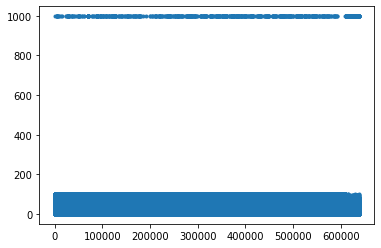

In [36]:
plt.plot(df['Victim Age'], '.')

In [39]:
print('max found age = ', df['Victim Age'].max())
print('min found age = ', df['Victim Age'].min())

max found age =  998
min found age =  0


In [42]:
df.loc[df['Victim Age'] == 998, 'Victim Age'].count()

974

In [46]:
df_dropped = df[df['Victim Age'] != 998]

In [47]:
print(df.shape)
print(df_dropped.shape)

(638454, 24)
(637480, 24)


# Perpetrator Age

In [74]:
df['Perpetrator Age'].dtype

dtype('O')

In [76]:
df['Perpetrator Age'].astype(int)

ValueError: invalid literal for int() with base 10: ' '

In [75]:
df['Perpetrator Age'].unique()

array(['15', '42', '0', '36', '27', '35', '40', '49', '39', '29', '19',
       '23', '33', '26', '41', '28', '61', '25', '7', '17', '34', '21',
       '43', '38', '66', '32', '37', '22', '30', '24', '65', '51', '60',
       '45', '64', '18', '20', '44', '73', '62', '69', '52', '16', '90',
       '56', '47', '57', '31', '46', '14', '55', '50', '54', '68', '77',
       '53', '67', '48', '76', '58', '71', '63', '89', '13', '75', '72',
       '93', '59', '10', '11', '79', '74', '99', '70', '78', '80', '9',
       '12', '81', '6', '87', '82', '83', '8', '84', '85', '86', '5', '3',
       '1', '88', '95', '4', '91', '92', '96', '94', '2', '98', '97', ' '],
      dtype=object)

In [77]:
df.index[df['Perpetrator Age'] == ' ']

Int64Index([634666], dtype='int64')

In [78]:
df.shape

(638454, 24)

In [79]:
df = df.drop(labels=df.index[df['Perpetrator Age'] == ' '])

In [80]:
df.shape

(638453, 24)

In [82]:
print(df['Perpetrator Age'].dtype)  # check dtype
df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)  # cast to int
print(df['Perpetrator Age'].dtype)  # re-check dtype

object
int32


# Weapons

In [89]:
df['Weapon'].value_counts()

Handgun          317483
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

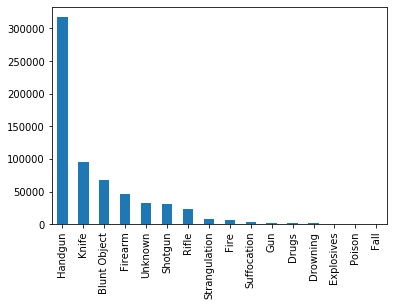

In [88]:
df['Weapon'].value_counts().plot(kind='bar')

In [94]:
df['Weapon'] = df['Weapon'].str.replace('Handgun', 'Gun')  # replaces one at a time

In [101]:
guns = {'Firearm': 'Gun', 'Shotgun': 'Gun', 'Rifle': 'Gun'}

for var_to_replace in ['Firearm', 'Shotgun', 'Rifle']:
    print('var_to_replace is ', var_to_replace)
    df['Weapon'] = df['Weapon'].str.replace(var_to_replace, 'Gun')

var_to_replace is  Firearm
var_to_replace is  Shotgun
var_to_replace is  Rifle


In [100]:
df['Weapon'].value_counts()

Gun              420738
Knife             94962
Blunt Object      67337
Unknown           33192
Strangulation      8110
Fire               6173
Suffocation        3968
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

## What else can you find?